# Baseball Case Study

In [161]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [162]:
#load data
baseball = pd.read_csv('baseball.csv')
baseball

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,93
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78


In [163]:
# as column names are not in conventional manner so,lets change name of columns
baseball.columns= ["Runs","At Bats","Hits","Doubles","Triples","Homeruns","Walks","Strikeouts","Stolen Bases","Runs Allowed","Earned Runs","Earned Run Average","Complete Game","Shutouts","Saves","Errors","No.of predicted wins"
]
            

In [164]:
# again look in data having proper column names
baseball

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Game,Shutouts,Saves,Errors,No.of predicted wins
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,93
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78


In [165]:
# lets check shape i.e. no. of columns and rows
baseball.shape

(30, 17)

In [166]:
#lets check the keys
baseball.keys()

Index(['Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks',
       'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average', 'Complete Game', 'Shutouts', 'Saves', 'Errors',
       'No.of predicted wins'],
      dtype='object')

In [167]:
#lets check the values
baseball.values

array([[7.240e+02, 5.575e+03, 1.497e+03, 3.000e+02, 4.200e+01, 1.390e+02,
        3.830e+02, 9.730e+02, 1.040e+02, 6.410e+02, 6.010e+02, 3.730e+00,
        2.000e+00, 8.000e+00, 5.600e+01, 8.800e+01, 9.500e+01],
       [6.960e+02, 5.467e+03, 1.349e+03, 2.770e+02, 4.400e+01, 1.560e+02,
        4.390e+02, 1.264e+03, 7.000e+01, 7.000e+02, 6.530e+02, 4.070e+00,
        2.000e+00, 1.200e+01, 4.500e+01, 8.600e+01, 8.300e+01],
       [6.690e+02, 5.439e+03, 1.395e+03, 3.030e+02, 2.900e+01, 1.410e+02,
        5.330e+02, 1.157e+03, 8.600e+01, 6.400e+02, 5.840e+02, 3.670e+00,
        1.100e+01, 1.000e+01, 3.800e+01, 7.900e+01, 8.100e+01],
       [6.220e+02, 5.533e+03, 1.381e+03, 2.600e+02, 2.700e+01, 1.360e+02,
        4.040e+02, 1.231e+03, 6.800e+01, 7.010e+02, 6.430e+02, 3.980e+00,
        7.000e+00, 9.000e+00, 3.700e+01, 1.010e+02, 7.600e+01],
       [6.890e+02, 5.605e+03, 1.515e+03, 2.890e+02, 4.900e+01, 1.510e+02,
        4.550e+02, 1.259e+03, 8.300e+01, 8.030e+02, 7.460e+02, 4.640e+00,
    

In [168]:
#convert the given data into form of DataFrame
df_baseball=pd.DataFrame(data=baseball)
df_baseball

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Game,Shutouts,Saves,Errors,No.of predicted wins
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,93
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78


In [169]:
#lets check the shape of dataframe
df_baseball.shape

(30, 17)

In [170]:
#lets check the columns
df_baseball.columns

Index(['Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks',
       'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average', 'Complete Game', 'Shutouts', 'Saves', 'Errors',
       'No.of predicted wins'],
      dtype='object')

In [171]:
# lets see dataframe again
df_baseball

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Game,Shutouts,Saves,Errors,No.of predicted wins
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,93
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78


In [172]:
#lets check the datatypes of columns
df_baseball.dtypes

Runs                      int64
At Bats                   int64
Hits                      int64
Doubles                   int64
Triples                   int64
Homeruns                  int64
Walks                     int64
Strikeouts                int64
Stolen Bases              int64
Runs Allowed              int64
Earned Runs               int64
Earned Run Average      float64
Complete Game             int64
Shutouts                  int64
Saves                     int64
Errors                    int64
No.of predicted wins      int64
dtype: object

In [173]:
# lets check the information of DataFrame
df_baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Runs                  30 non-null     int64  
 1   At Bats               30 non-null     int64  
 2   Hits                  30 non-null     int64  
 3   Doubles               30 non-null     int64  
 4   Triples               30 non-null     int64  
 5   Homeruns              30 non-null     int64  
 6   Walks                 30 non-null     int64  
 7   Strikeouts            30 non-null     int64  
 8   Stolen Bases          30 non-null     int64  
 9   Runs Allowed          30 non-null     int64  
 10  Earned Runs           30 non-null     int64  
 11  Earned Run Average    30 non-null     float64
 12  Complete Game         30 non-null     int64  
 13  Shutouts              30 non-null     int64  
 14  Saves                 30 non-null     int64  
 15  Errors                30 

In [174]:
#lets check for the null values
df_baseball.isnull().sum()

Runs                    0
At Bats                 0
Hits                    0
Doubles                 0
Triples                 0
Homeruns                0
Walks                   0
Strikeouts              0
Stolen Bases            0
Runs Allowed            0
Earned Runs             0
Earned Run Average      0
Complete Game           0
Shutouts                0
Saves                   0
Errors                  0
No.of predicted wins    0
dtype: int64

In [175]:
# again verify whether any null value is present or not
df_baseball.isnull()

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Game,Shutouts,Saves,Errors,No.of predicted wins
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


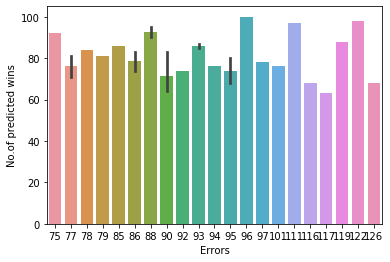

In [176]:
#lets check what is the no.of predicted wins grouped by Errors
sns.barplot(x="Errors",y="No.of predicted wins",data=df_baseball)
plt.show()

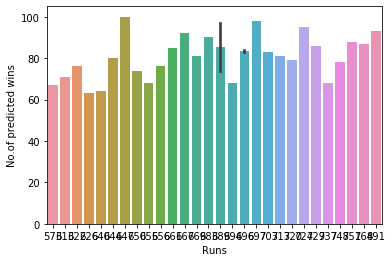

In [177]:
#lets check what is the no.of predicted wins grouped by Errors
sns.barplot(x="Runs",y="No.of predicted wins",data=df_baseball)
plt.show()

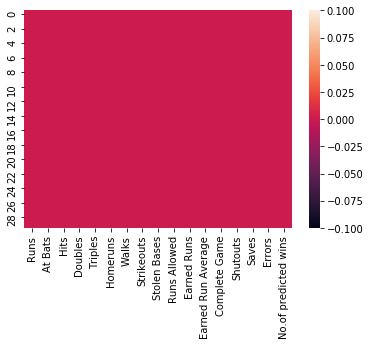

In [178]:
# lets see heatmap
sns.heatmap(df_baseball.isnull())

In [179]:
#lets check correlation matrix
df_baseball.corr()

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Game,Shutouts,Saves,Errors,No.of predicted wins
Runs,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262,0.430751
At Bats,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743,-0.087947
Hits,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173,0.037612
Doubles,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754,0.427797
Triples,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678,-0.251118
Homeruns,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597,0.307407
Walks,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685,0.484342
Strikeouts,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133,0.111850
Stolen Bases,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149,-0.157234
Runs Allowed,-0.041623,0.316010,0.224324,-0.218160,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.991018,0.986674,-0.016659,-0.636862,-0.616224,0.198996,-0.812952


In [180]:
#lets describe the matrix
df_baseball.describe()

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Game,Shutouts,Saves,Errors,No.of predicted wins
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333,80.966667
std,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889,10.453455
min,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000,63.000000
25%,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000,74.000000
50%,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000,81.000000
75%,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000,87.750000
max,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000,100.000000


In [181]:
#lets check the skewness of the dataset
df_baseball.skew()
# there is some skewness which needs to be treated,by seeing we can say only +ve skewness is significant and needs to be treated

Runs                    1.200786
At Bats                 0.183437
Hits                    0.670254
Doubles                -0.230650
Triples                 0.129502
Homeruns                0.516441
Walks                   0.158498
Strikeouts             -0.156065
Stolen Bases            0.479893
Runs Allowed            0.045734
Earned Runs             0.058710
Earned Run Average      0.053331
Complete Game           0.736845
Shutouts                0.565790
Saves                   0.657524
Errors                  0.890132
No.of predicted wins    0.047089
dtype: float64

In [182]:
# treating skewness using log
import numpy as np
for col in df_baseball.columns:
    if df_baseball.skew().loc[col]>0.55:
        df_baseball[col]= np.log1p(df_baseball[col])

In [183]:
#again check the skewness
df_baseball.skew()

Runs                    0.744813
At Bats                 0.183437
Hits                    0.628584
Doubles                -0.230650
Triples                 0.129502
Homeruns                0.516441
Walks                   0.158498
Strikeouts             -0.156065
Stolen Bases            0.479893
Runs Allowed            0.045734
Earned Runs             0.058710
Earned Run Average      0.053331
Complete Game          -0.325962
Shutouts               -0.589640
Saves                   0.163057
Errors                  0.632916
No.of predicted wins    0.047089
dtype: float64

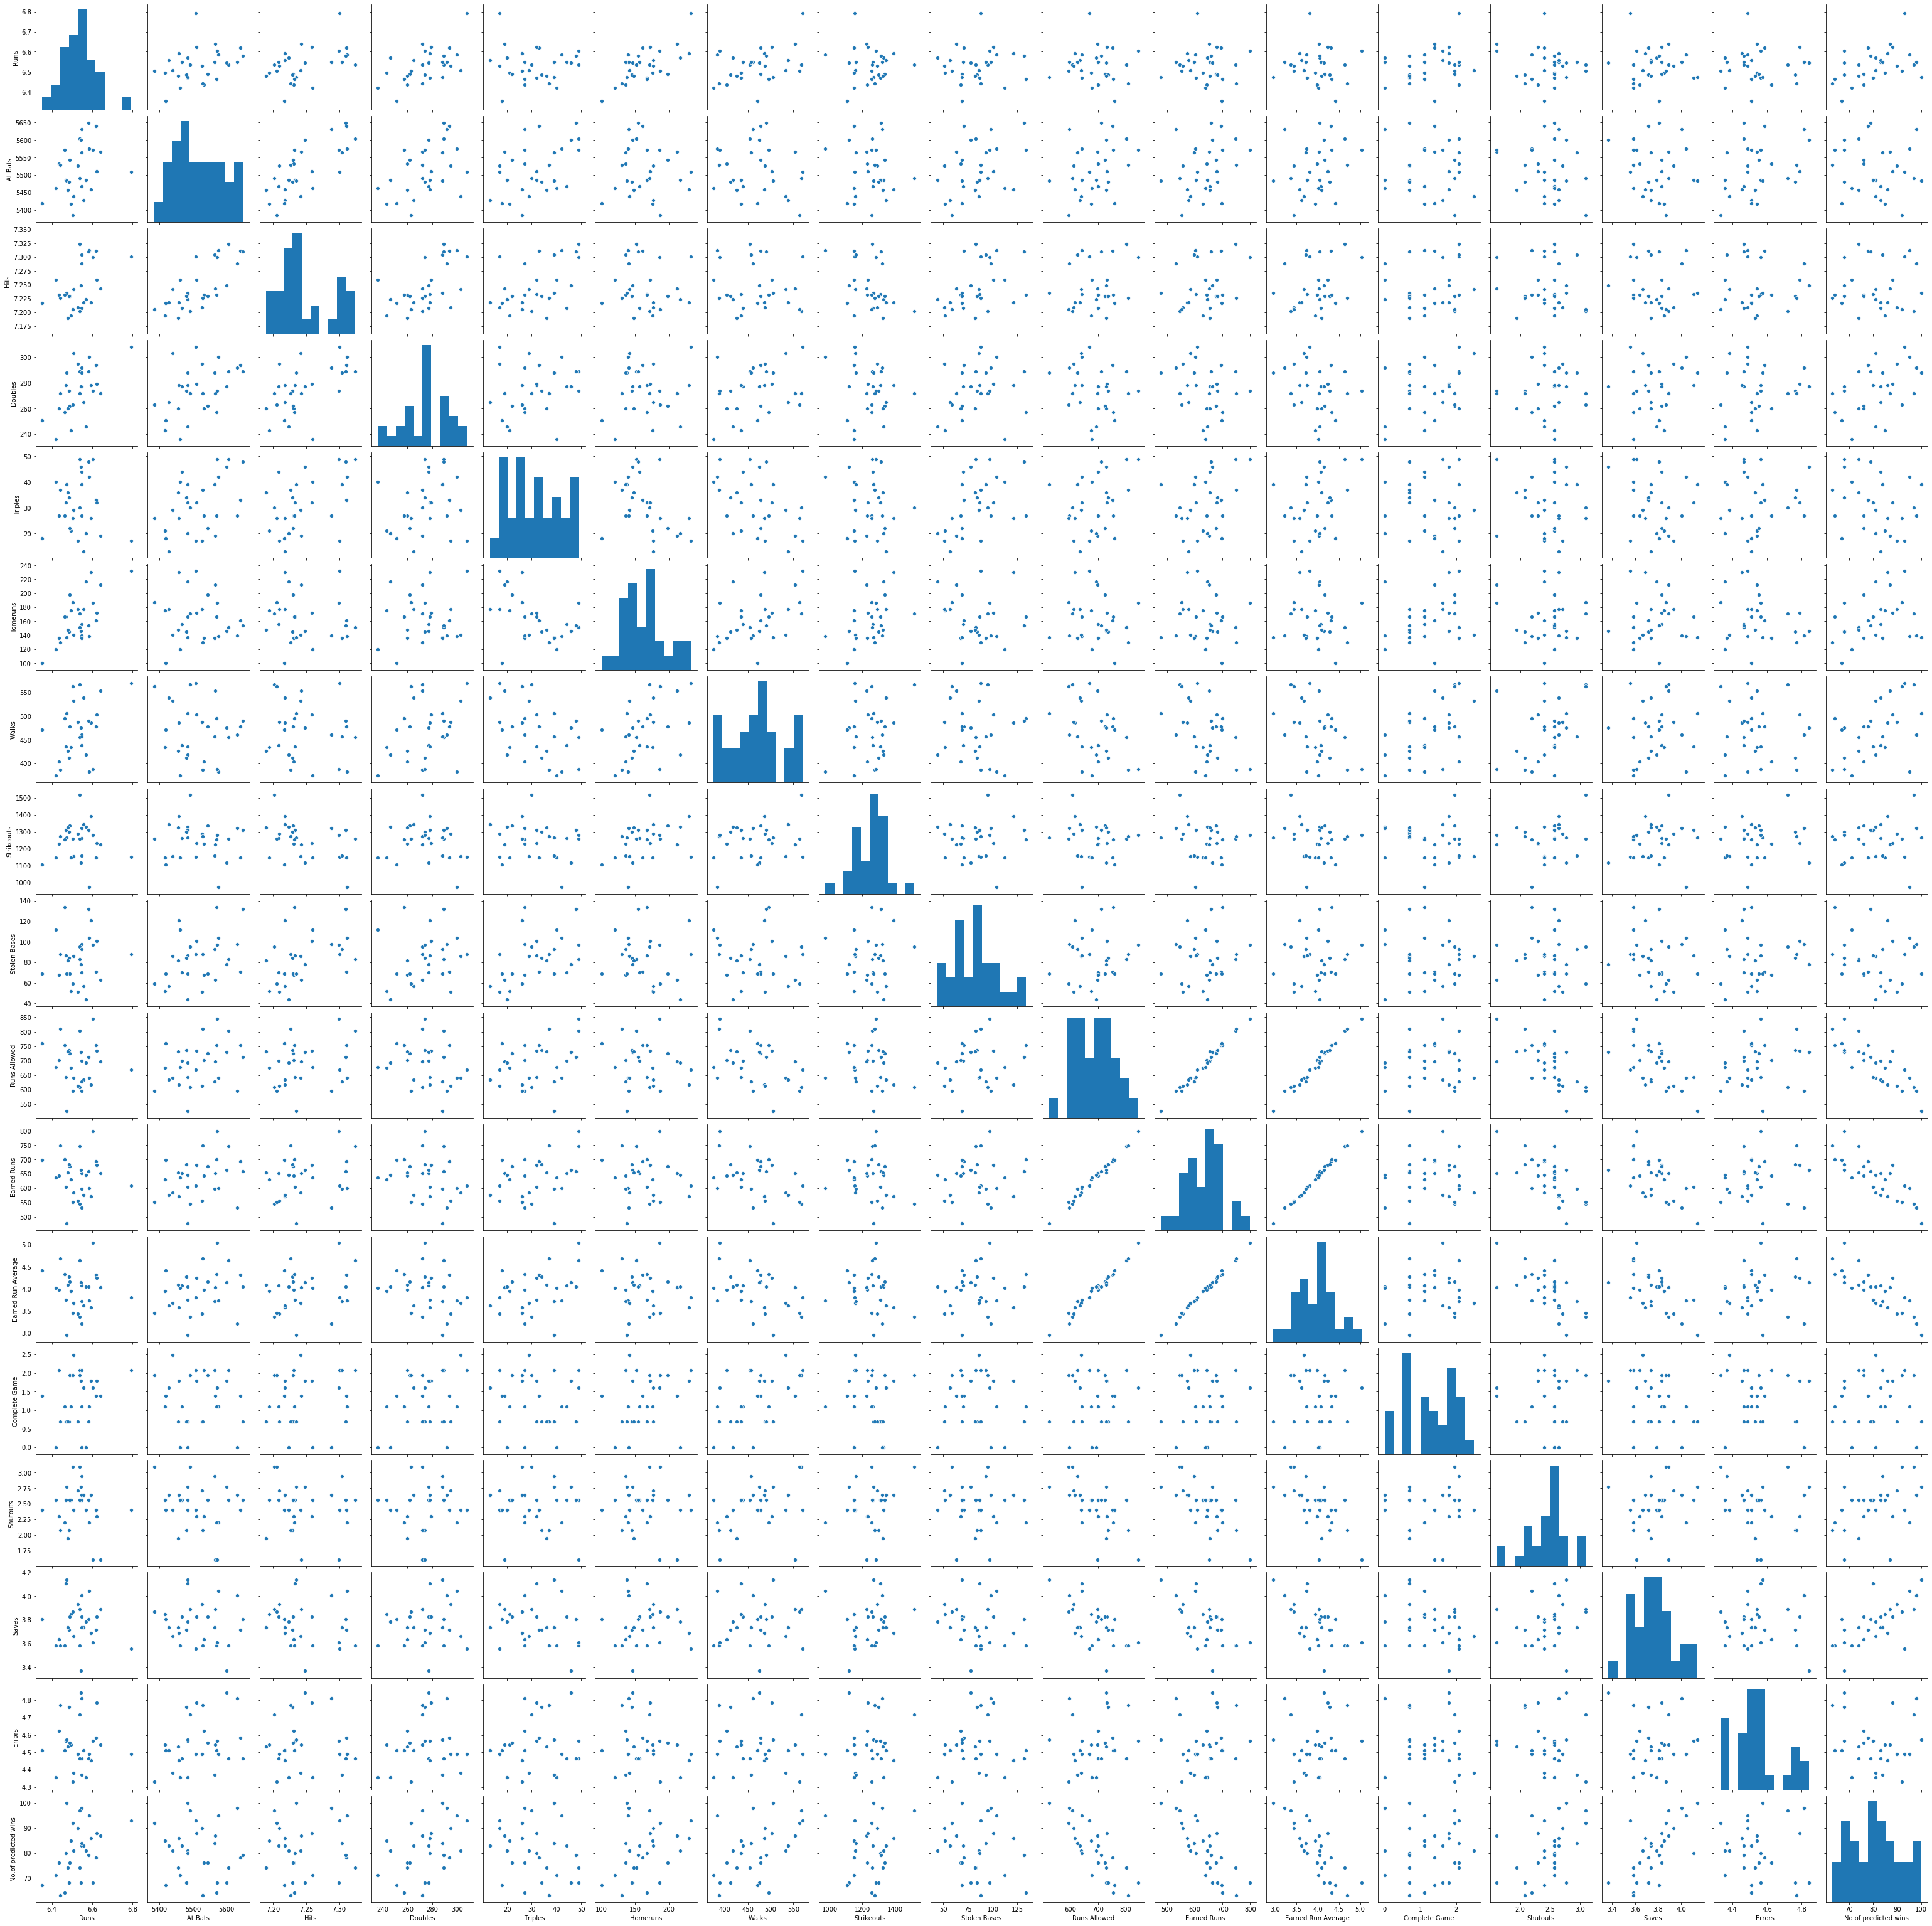

In [184]:
# let's see all pairplots
sns.pairplot(df_baseball)
plt.show()

In [185]:
# Now lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(df_baseball))
print(df_baseball.shape)
df_baseball_final= df_baseball.loc[(z_score<3).all(axis=1)]
print((df_baseball_final.shape))

(30, 17)
(29, 17)


In [186]:
# seperate target and input variables
#np.log1p
df_x=df_baseball_final.drop(columns=["No.of predicted wins"])
y=df_baseball_final[["No.of predicted wins"]]

In [187]:
# Now scaling the input variable
# linear regression algorithm requires all features to be on common scale
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x= sc.fit_transform(df_x)
x= pd.DataFrame(x,columns=df_x.columns)

In [188]:
x.skew()

Runs                 -0.388428
At Bats               0.169573
Hits                  0.738455
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Walks                 0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game        -0.275681
Shutouts             -0.598073
Saves                 0.109983
Errors                0.586101
dtype: float64

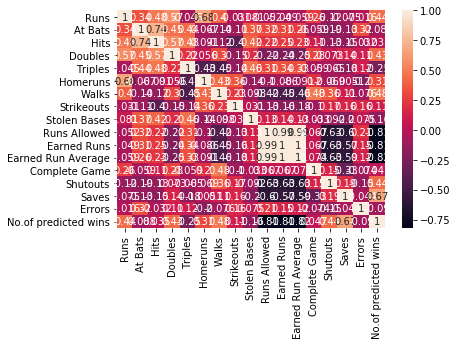

In [189]:
sns.heatmap(df_baseball.corr(),annot=True)

In [190]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=55, test_size=0.20)

In [191]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred= regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
    print("max r2_score corrosponding to", final_r_state,"is", max_r_score)

max r2_score corrosponding to 42 is 0.6172755127341238
max r2_score corrosponding to 42 is 0.6172755127341238
max r2_score corrosponding to 42 is 0.6172755127341238
max r2_score corrosponding to 42 is 0.6172755127341238
max r2_score corrosponding to 42 is 0.6172755127341238
max r2_score corrosponding to 42 is 0.6172755127341238
max r2_score corrosponding to 42 is 0.6172755127341238
max r2_score corrosponding to 42 is 0.6172755127341238
max r2_score corrosponding to 50 is 0.7341393534932488
max r2_score corrosponding to 50 is 0.7341393534932488
max r2_score corrosponding to 50 is 0.7341393534932488
max r2_score corrosponding to 50 is 0.7341393534932488
max r2_score corrosponding to 50 is 0.7341393534932488
max r2_score corrosponding to 50 is 0.7341393534932488
max r2_score corrosponding to 50 is 0.7341393534932488
max r2_score corrosponding to 50 is 0.7341393534932488
max r2_score corrosponding to 50 is 0.7341393534932488
max r2_score corrosponding to 50 is 0.7341393534932488
max r2_sco

In [192]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()


-3.020376454484991

In [193]:
#max r2_score we get at random state 56
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=56,test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [194]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2 score is :", r2_score(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is : 0.6885715570367426
RMSE is : 4.3990700624260946


In [195]:
# lets save above model
from sklearn.externals import joblib
# save the model as pickle in file

joblib.dump(lreg, "baseball.pkl")

['baseball.pkl']